# WeatherPy
----

#### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
#api_key = weather_api_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)
print(lat_lngs)
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#debugging no more than 60 per min
# cities=cities[0:50]
# cities

603

### Perform API Calls


In [9]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
city_data = []

print("Beginning Data Retrieval     ")
print("-----------------------------")

#number
record_number=1
series_number = 1

# Include a print log of each city as it'sbeing processed (with the city number and city name).
for i, city in enumerate(cities):
    
    if (i % 50 == 0 and i >= 50):
        series_number += 1
        record_number = 0
        
    print("Processing Record %s of Set %s | %s" % (record_number, series_number, city)) 
    
    record_number += 1
    
    query_url = (url) + "&q=" + (city)
    
    try:
                
        city_weather = requests.get(query_url).json()
        
#         print(response)
        city_lat = city_weather["coord"]['lat']
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        #append to list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
#         if number % 50:
#             time.sleep(60)
#             record_number = 1
#             series_number += 1
# #             city_data_list(city_dict)
#         else:
#             record_number += 1
#             city_data_list(city)
       
        
        
    except:
        print('City not found. Skipping...')
        pass
        
print("-----------------------")       
print("Processing Finished!")
print("-----------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nome
Processing Record 2 of Set 1 | arraial do cabo
Processing Record 3 of Set 1 | dunedin
Processing Record 4 of Set 1 | hobart
Processing Record 5 of Set 1 | ariquemes
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | inirida
Processing Record 8 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 9 of Set 1 | saint george
Processing Record 10 of Set 1 | san andres
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | redmond
Processing Record 13 of Set 1 | mackay
Processing Record 14 of Set 1 | butaritari
Processing Record 15 of Set 1 | bolshiye berezniki
City not found. Skipping...
Processing Record 16 of Set 1 | new norfolk
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | kinsale
Processing Record 19 of Set 1 | castro
Processing Record 20 of Set 1 | gigmoto
Processing Record 21 of Set 1 | newport
Processing Re

Processing Record 39 of Set 4 | verkhnevilyuysk
Processing Record 40 of Set 4 | viedma
Processing Record 41 of Set 4 | fort nelson
Processing Record 42 of Set 4 | vaini
Processing Record 43 of Set 4 | broken hill
Processing Record 44 of Set 4 | cabo san lucas
Processing Record 45 of Set 4 | klaksvik
Processing Record 46 of Set 4 | lata
Processing Record 47 of Set 4 | ayna
Processing Record 48 of Set 4 | lebu
Processing Record 49 of Set 4 | kirakira
Processing Record 0 of Set 5 | concordia
Processing Record 1 of Set 5 | rock sound
Processing Record 2 of Set 5 | sechura
Processing Record 3 of Set 5 | agboville
Processing Record 4 of Set 5 | namibe
Processing Record 5 of Set 5 | weligama
Processing Record 6 of Set 5 | ilka
City not found. Skipping...
Processing Record 7 of Set 5 | khao wong
Processing Record 8 of Set 5 | guerrero negro
Processing Record 9 of Set 5 | hosangadi
Processing Record 10 of Set 5 | nhulunbuy
Processing Record 11 of Set 5 | shingu
Processing Record 12 of Set 5 | l

Processing Record 29 of Set 8 | hollins
Processing Record 30 of Set 8 | labuhan
Processing Record 31 of Set 8 | balkanabat
Processing Record 32 of Set 8 | tilichiki
Processing Record 33 of Set 8 | satrikh
Processing Record 34 of Set 8 | brae
Processing Record 35 of Set 8 | rosarito
Processing Record 36 of Set 8 | port lincoln
Processing Record 37 of Set 8 | puro
Processing Record 38 of Set 8 | komsomolskoye
Processing Record 39 of Set 8 | eyl
Processing Record 40 of Set 8 | marystown
Processing Record 41 of Set 8 | tonekabon
Processing Record 42 of Set 8 | lexington park
Processing Record 43 of Set 8 | marzuq
Processing Record 44 of Set 8 | krasnyy chikoy
Processing Record 45 of Set 8 | whitehorse
Processing Record 46 of Set 8 | lucapa
Processing Record 47 of Set 8 | solnechnyy
Processing Record 48 of Set 8 | hambantota
Processing Record 49 of Set 8 | kalengwa
Processing Record 0 of Set 9 | dali
Processing Record 1 of Set 9 | chicama
Processing Record 2 of Set 9 | paita
Processing Reco

Processing Record 11 of Set 12 | ponta pora
Processing Record 12 of Set 12 | ndele
Processing Record 13 of Set 12 | edinburg
Processing Record 14 of Set 12 | channel-port aux basques
Processing Record 15 of Set 12 | kendari
Processing Record 16 of Set 12 | gornoye loo
Processing Record 17 of Set 12 | nizhneudinsk
Processing Record 18 of Set 12 | panalingaan
Processing Record 19 of Set 12 | segou
Processing Record 20 of Set 12 | shouguang
Processing Record 21 of Set 12 | dalby
Processing Record 22 of Set 12 | syedove
Processing Record 23 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 24 of Set 12 | ankazobe
Processing Record 25 of Set 12 | zarechnyy
Processing Record 26 of Set 12 | bolshaya sosnova
Processing Record 27 of Set 12 | rancho palos verdes
Processing Record 28 of Set 12 | puerto ayacucho
Processing Record 29 of Set 12 | tahlequah
Processing Record 30 of Set 12 | kutum
Processing Record 31 of Set 12 | mount darwin
Processing Record 32 of Set 12 | stams

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:

# convert to dataframe
weather_data = pd.DataFrame(city_data)

weather_data.count()



City          552
Lat           552
Lng           552
Max Temp      552
Humidity      552
Cloudiness    552
Wind Speed    552
Country       552
Date          552
dtype: int64

In [12]:
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nome,64.5011,-165.4064,48.27,87,90,17.27,US,1628961563
1,arraial do cabo,-22.9661,-42.0278,66.16,88,90,5.75,BR,1628961563
2,dunedin,-45.8742,170.5036,49.80,47,64,11.01,NZ,1628961563
3,hobart,-42.8794,147.3294,55.26,63,90,5.01,AU,1628961282
4,ariquemes,-9.9133,-63.0408,99.34,21,22,3.00,BR,1628961564


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,5.520000e+02
mean,21.060162,16.775522,71.074022,69.387681,53.161232,8.070779,1.628962e+09
std,33.314294,90.902036,14.387665,21.417933,37.622556,5.424012,7.739269e+01
min,-54.800000,-175.200000,36.660000,6.000000,0.000000,0.000000,1.628961e+09
25%,-6.925925,-62.304375,59.477500,57.000000,16.000000,4.000000,1.628962e+09
50%,26.729400,23.433350,73.460000,75.000000,59.500000,6.910000,1.628962e+09
75%,49.206725,99.316525,80.732500,85.000000,90.000000,10.972500,1.628962e+09
max,78.218600,179.316700,109.920000,100.000000,100.000000,32.440000,1.628962e+09


In [15]:
#  Get the indices of cities that have humidity over 100%.
dirty_weather_data = weather_data[(weather_data['Humidity'] > 100)].index

dirty_weather_data



Int64Index([], dtype='int64')

In [16]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_weather_data = weather_data.drop(dirty_weather_data, inplace = False)

clean_weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nome,64.5011,-165.4064,48.27,87,90,17.27,US,1628961563
1,arraial do cabo,-22.9661,-42.0278,66.16,88,90,5.75,BR,1628961563
2,dunedin,-45.8742,170.5036,49.80,47,64,11.01,NZ,1628961563
3,hobart,-42.8794,147.3294,55.26,63,90,5.01,AU,1628961282
4,ariquemes,-9.9133,-63.0408,99.34,21,22,3.00,BR,1628961564


In [17]:
# Extract relevent fields from the data frame

lats = clean_weather_data['Lat']
max_temps = clean_weather_data['Max Temp']
humidity = clean_weather_data['Humidity']
cloudiness = clean_weather_data['Cloudiness']
wind_speed = clean_weather_data['Wind Speed']

# Export the data in a csv
clean_weather_data.to_csv(output_data_file, index_label = "City_ID")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

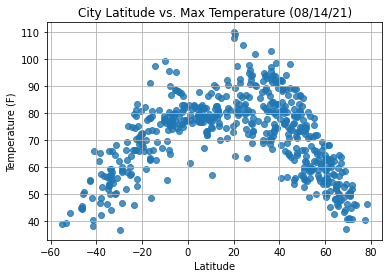

In [27]:
# Build a scatter plot for each data type
plt.scatter(lats, max_temps,linewidths= 1, marker="o", alpha=0.8, label = "Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x") )
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

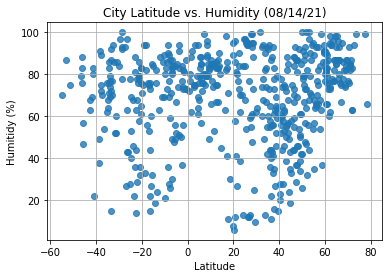

In [28]:
# Build a scatter plot for each data type
plt.scatter(lats, humidity ,linewidths= 1, marker="o", alpha=0.8, label = "Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humitidy (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

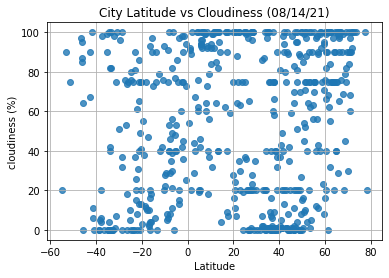

In [29]:
# Build a scatter plot for each data type
plt.scatter(lats, cloudiness, marker="o", linewidths= 1, alpha=0.8, label = "Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

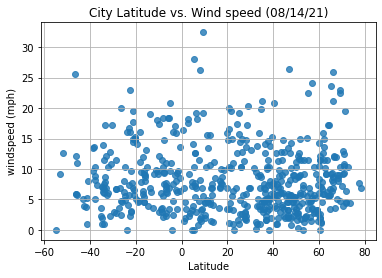

In [30]:
# Build a scatter plot for each data type
plt.scatter(lats, wind_speed, linewidths=1, marker="o", alpha= 0.8, label = "Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind speed (%s)" % time.strftime("%x"))
plt.ylabel("windspeed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

## Linear Regression

In [44]:
# Create Function to create linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
#     Run regression on Southern Hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
#     plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    
    print(f"the r-value is: {rvalue ** 2}")
    plt.show()

In [45]:
# create Northern and Southern Hemisphere DataFrames
northern_hemi_df = weather_data.loc[(weather_data["Lat"] >=0)]
southern_hemi_df = weather_data.loc[(weather_data["Lat"] < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

the r-value is: 0.4285815038953721


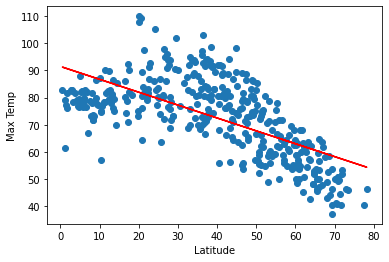

In [46]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (6,30))

#print scatter plot with regression
# plt.scatter(northern_hem['lat'],northern_hem['temp_max'])
# plt.title("Northern Hemisphere Temperature Regression")
# plt.ylabel("Temperature (Fahrenheit)")
# plt.xlabel("Latitude")
# plt.grid(True)

# print(plt.scatter)
# plt.plot(x_values, y_values, "r-")
# plt.plot


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

the r-value is: 0.64944423674575


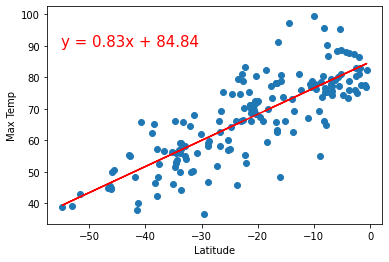

In [47]:
#southern hem scatter and regress
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-55, 90)) 

The high r value indicates a strong positive correlation between latitude and max temperature. R values ~ 0.5 indicate that there is a moderate positive correlation.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

the r-value is: 0.006461619708836628


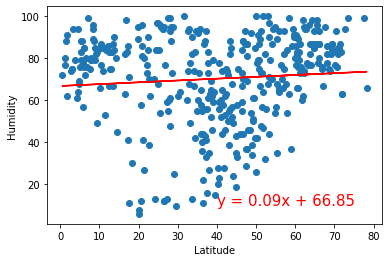

In [49]:
#  Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(40,10))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

the r-value is: 0.0014875275294427036


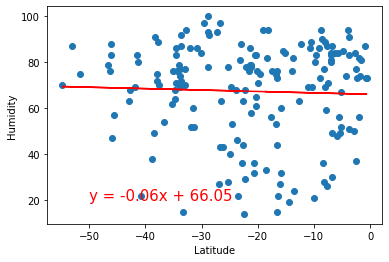

In [50]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-50, 20))

The low r values indicate a weak to no relationship between humidity and latitude.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

the r-value is: 0.002027539625914223


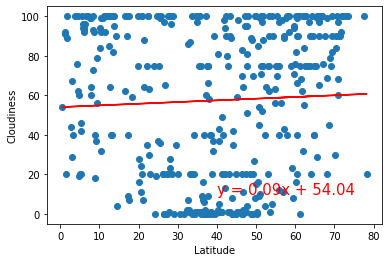

In [52]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (40,10))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

the r-value is: 0.0035072592930372654


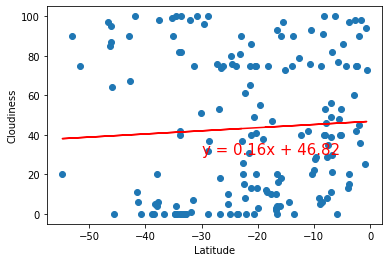

In [53]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-30,30))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

the r-value is: 2.331354351302186e-05


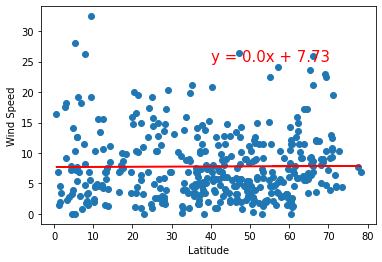

In [54]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (40,25))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

the r-value is: 0.006987851686799489


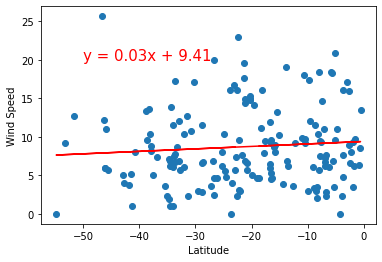

In [55]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-50, 20))

The low r values indicate that there is no real relationship between wind speed and latitude." The difference between the hemispheres doesn't seem to be significant enough to comment upon.